# Práctica Machine Learning

## Resumen del archivo
En este documento se encuentra el estudio y desarrollo de uno o varios modelos de Machine Learning sobre una base de datos de AirBnB siguiendo la metodología y prácticas vistas en clase de bootcamp

## Instalacion paquetes iniciales

In [65]:
#importar numpy
import numpy as np

#importar pandas
import pandas as pd

#importar matplot
import matplotlib.pyplot as plt
%matplotlib inline

#importar sklearn
import sklearn as sk

# 1. Split de datos

In [23]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


Trabajando solo con datos de train

In [24]:
df = pd.read_csv('./train.csv', sep=';', decimal='.')

# 2. Pre-procesamiento

In [26]:
# Elimino columnas que no puedo estudiar o no necesito
airbnb_drop = ["ID", "Listing Url", "Scrape ID", "Last Scraped", "Name", "Summary", "Host URL", "Host About", "Host Response Time",
                            "Space", "Description", "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules",
                            "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host Name", "Host Since",
                            "Host Location", "Host Thumbnail Url", "Host Neighbourhood", "Host Verifications", "Street",
                            "Neighbourhood", "Neighbourhood Cleansed", "State", "Country Code", "Country",
                            "Square Feet", "Weekly Price", "Monthly Price", "Has Availability", "Calendar last Scraped", "First Review",
                            "First Review", "Last Review", "License", "Jurisdiction Names", "Geolocation", "Neighbourhood",
                            "Host Picture Url", "Availability 30", "Availability 60", "Availability 90", "Review Scores Accuracy",
                            "Host Acceptance Rate", "Smart Location", "Zipcode", "City", "Amenities", "Calendar Updated", "Security Deposit",
                            "Host Listings Count", "Cleaning Fee", "Calculated host listings count", "Features", "Market", "Neighbourhood Group Cleansed",
                            "Host Response Rate", "Experiences Offered", "Minimum Nights", "Maximum Nights", "Host Total Listings Count"
                            ,"Cancellation Policy", "Accommodates", "Latitude", "Longitude", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value", "Reviews per Month"]

df.drop(airbnb_drop, axis=1, inplace=True)

In [27]:

#Análisis técnico inicial de las columnas
for cols in df.columns:
    print(f"Análisis de la columna: {cols}")
    print("Número de valores únicos:", len(df[cols].unique()))
    print("Filas:", df[cols].count())
    print("Es de tipo:", df[cols].dtype)
    print("Cantidad de NaN:", df[cols].isna().sum())
    print("Porcentaje de datos faltantes: {:.2f} %".format((df[cols].isna().sum() / df.shape[0]) * 100))
    print(df[cols].value_counts())
    print("-" * 40)
    

    


Análisis de la columna: Property Type
Número de valores únicos: 21
Filas: 11824
Es de tipo: object
Cantidad de NaN: 0
Porcentaje de datos faltantes: 0.00 %
Property Type
Apartment             9598
House                 1085
Condominium            284
Bed & Breakfast        274
Loft                   248
Other                  171
Dorm                    37
Guesthouse              32
Chalet                  22
Townhouse               15
Villa                   15
Hostel                  13
Serviced apartment       9
Boutique hotel           5
Camper/RV                3
Casa particular          3
Boat                     3
Guest suite              2
Earth House              2
Bungalow                 2
Tent                     1
Name: count, dtype: int64
----------------------------------------
Análisis de la columna: Room Type
Número de valores únicos: 3
Filas: 11824
Es de tipo: object
Cantidad de NaN: 0
Porcentaje de datos faltantes: 0.00 %
Room Type
Entire home/apt    7191
Private roo

In [28]:
df.columns

Index(['Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Price', 'Guests Included', 'Extra People',
       'Availability 365', 'Number of Reviews'],
      dtype='object')

15


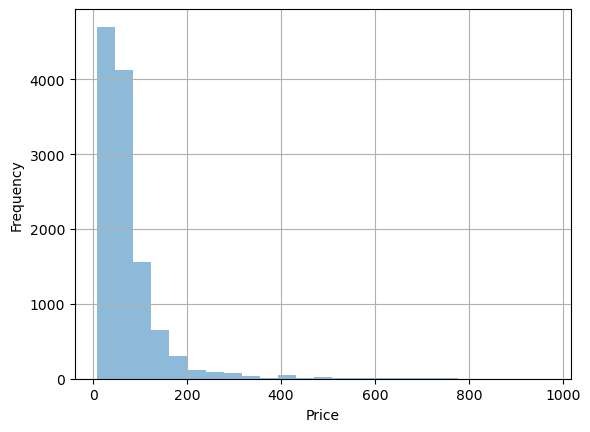

In [29]:
print(df["Price"].isna().sum())
df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.show()

Reducimos overfitting en Price

In [30]:
df = df[df['Price'] < 200]

## Categorización de variables

In [31]:
df = df[df['Bathrooms'] != 0]
df = df[df['Price'] != 0]

In [32]:
list(df.select_dtypes(include=['object']).columns)

['Property Type', 'Room Type', 'Bed Type']

In [33]:
df_nn = df[list(df.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique())) # valores diferentes

Property Type    21
Room Type         3
Bed Type          5
dtype: int64

In [34]:
len(df_nn) - df_nn.count()

Property Type    0
Room Type        0
Bed Type         0
dtype: int64

In [35]:
categorical = ["Property Type", "Room Type", "Bed Type"
]

# Creamos un dict para usarlo después en test
mean_map = {}
for c in categorical:
    mean = df.groupby(c)['Price'].mean()
    df[c] = df[c].map(mean)    
    mean_map[c] = mean

Rellenamos con la media

In [36]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df = df[cols]

df.fillna(df.mean(), inplace=True)
df.isnull().any()

Price                False
Property Type        False
Room Type            False
Bathrooms            False
Bedrooms             False
Beds                 False
Bed Type             False
Guests Included      False
Extra People         False
Availability 365     False
Number of Reviews    False
dtype: bool

# 3. Análisis

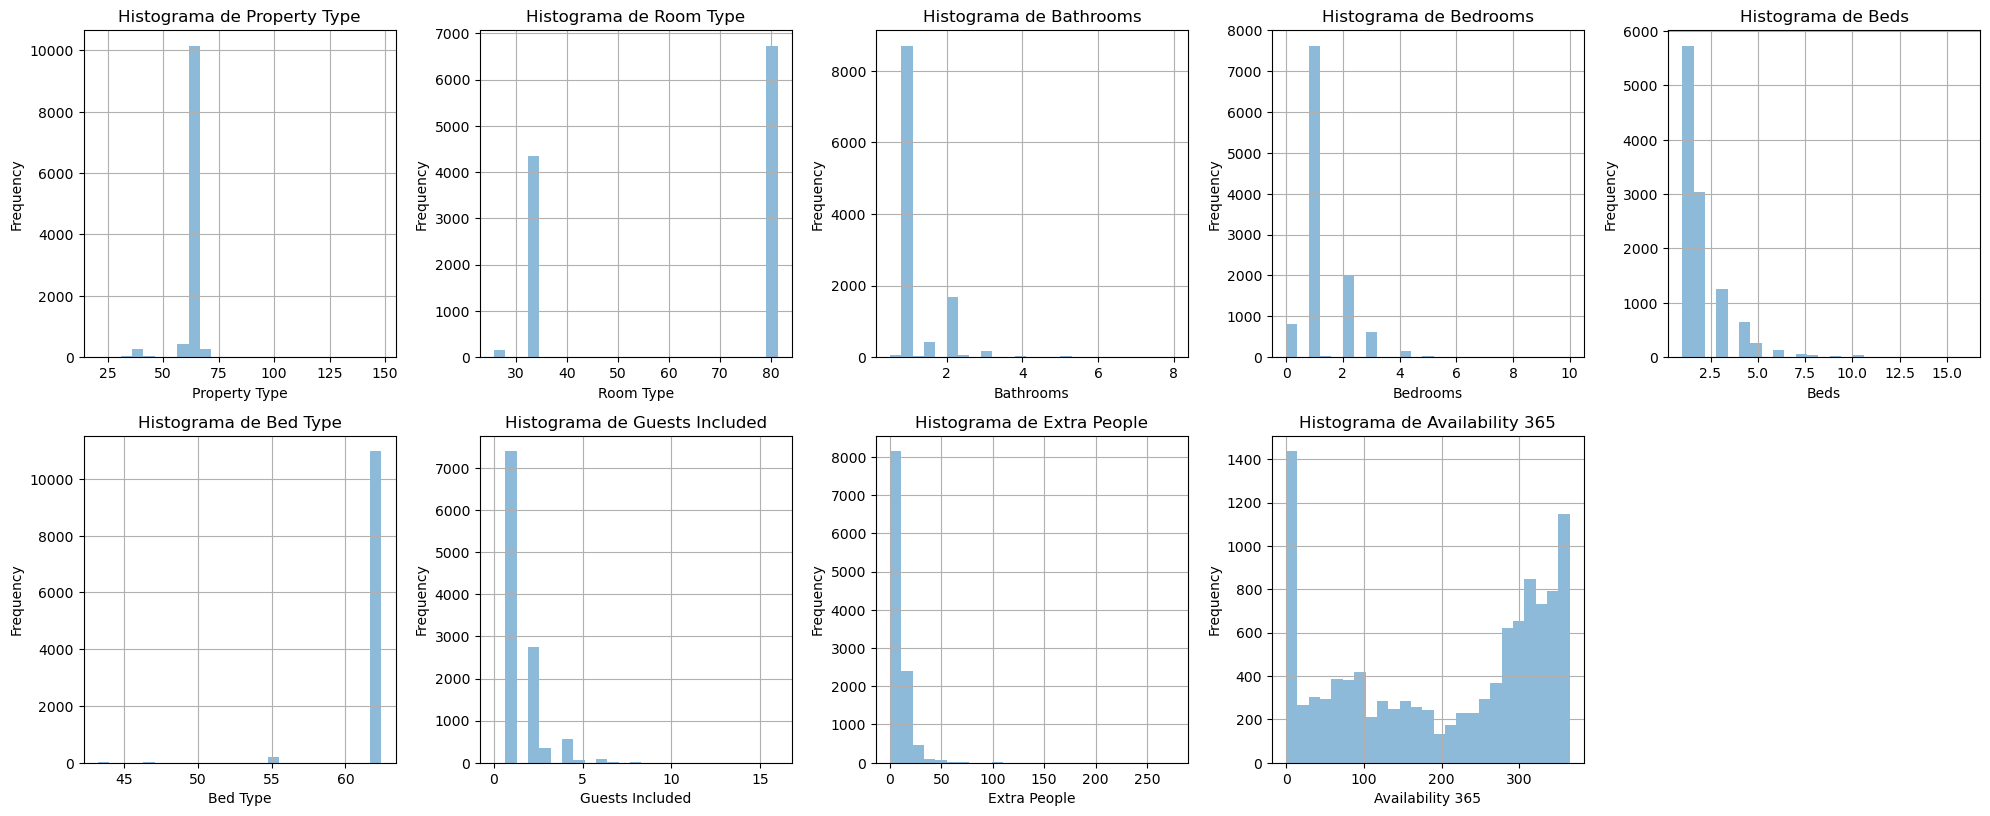

In [59]:
# Definir las columnas a graficar
columnas_a_graficar = [
    "Property Type", "Room Type", "Bathrooms", 
    "Bedrooms", "Beds", "Bed Type", "Guests Included", 
    "Extra People", "Availability 365"]

# Configurar la figura
plt.figure(figsize=(20, 20))

# Crear un histograma para cada columna
for i, column in enumerate(columnas_a_graficar):
    plt.subplot(5, 5, i + 1)  # Ajustar el número de filas y columnas según sea necesario
    df[column].plot.hist(alpha=0.5, bins=25, grid=True)
    plt.xlabel(column)
    plt.title(f'Histograma de {column}')

plt.tight_layout()  # Ajustar el espaciado entre subgráficas
plt.show()

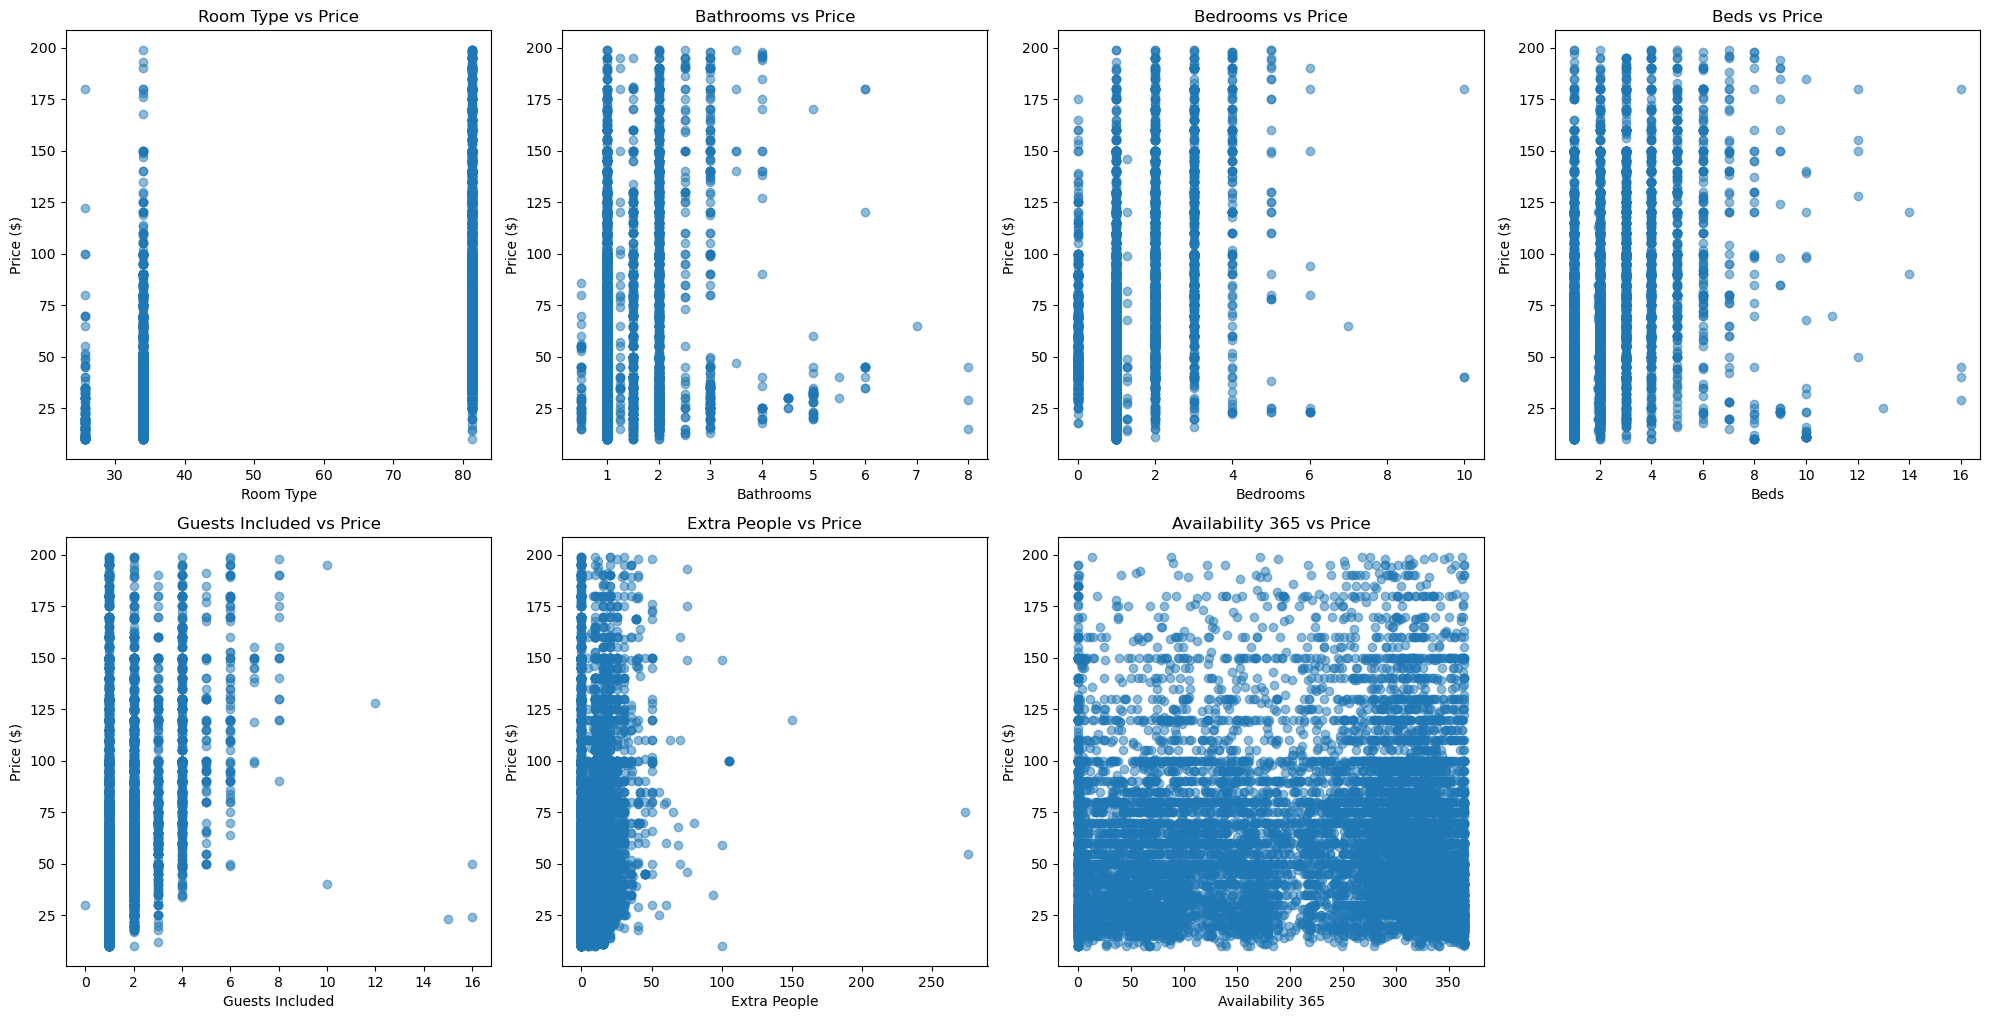

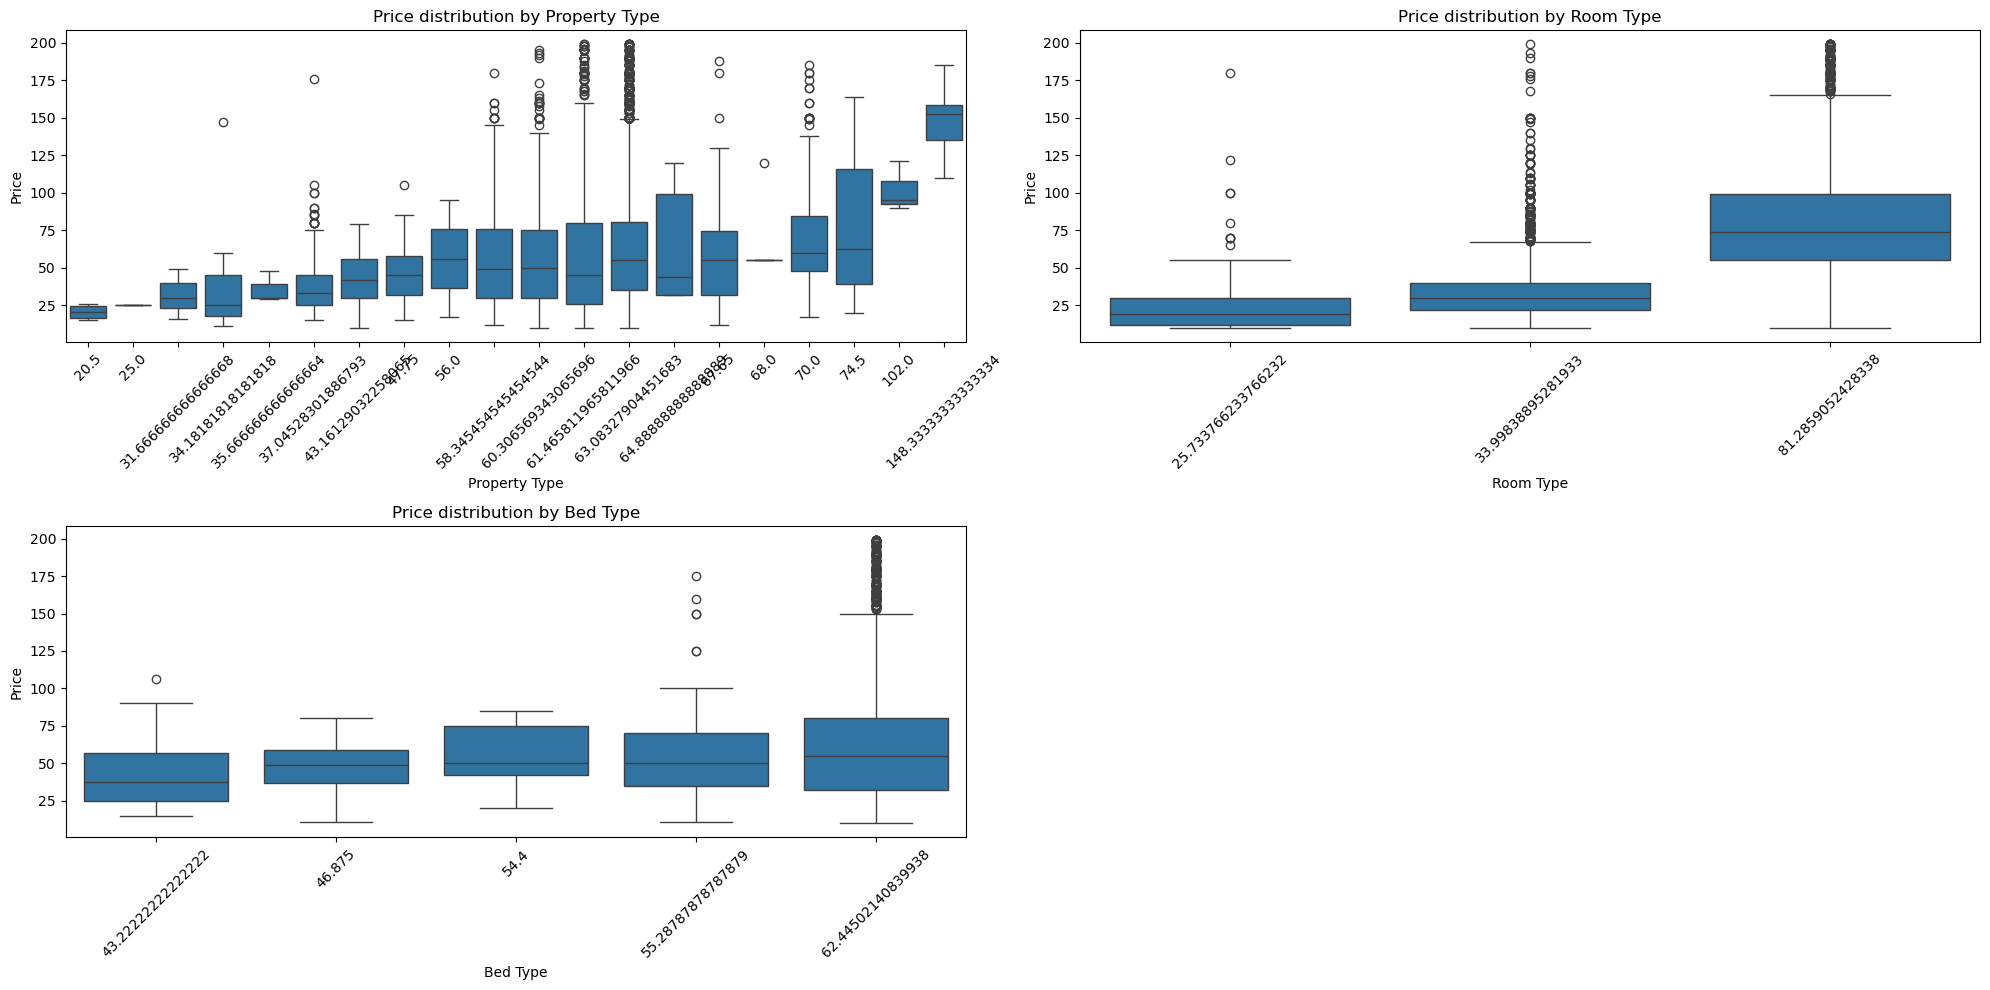

In [61]:
import seaborn as sns
# Mostrar scatter plot de las variables
columnas_a_graficar = [
    "Room Type", "Bathrooms", "Bedrooms", "Beds", "Guests Included", 
    "Extra People", "Availability 365"
]

plt.figure(figsize=(20, 20))

# Crear scatter plots
for i, column in enumerate(columnas_a_graficar):
    plt.subplot(4, 4, i + 1)
    plt.scatter(df[column], df["Price"], alpha=0.5)  # Usar plt.scatter directamente
    plt.xlabel(column)
    plt.ylabel('Price ($)')
    plt.title(f'{column} vs Price')

plt.tight_layout()
plt.show()

# Mostrar boxplot de las variables categóricas
columnas_a_graficar_box = [
    "Property Type", "Room Type", "Bed Type"
]

plt.figure(figsize=(20, 10))

for i, column in enumerate(columnas_a_graficar_box):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=column, y='Price', data=df)  # Usar seaborn para mejores boxplots
    plt.xticks(rotation=45)
    plt.title(f'Price distribution by {column}')

plt.tight_layout()
plt.show()

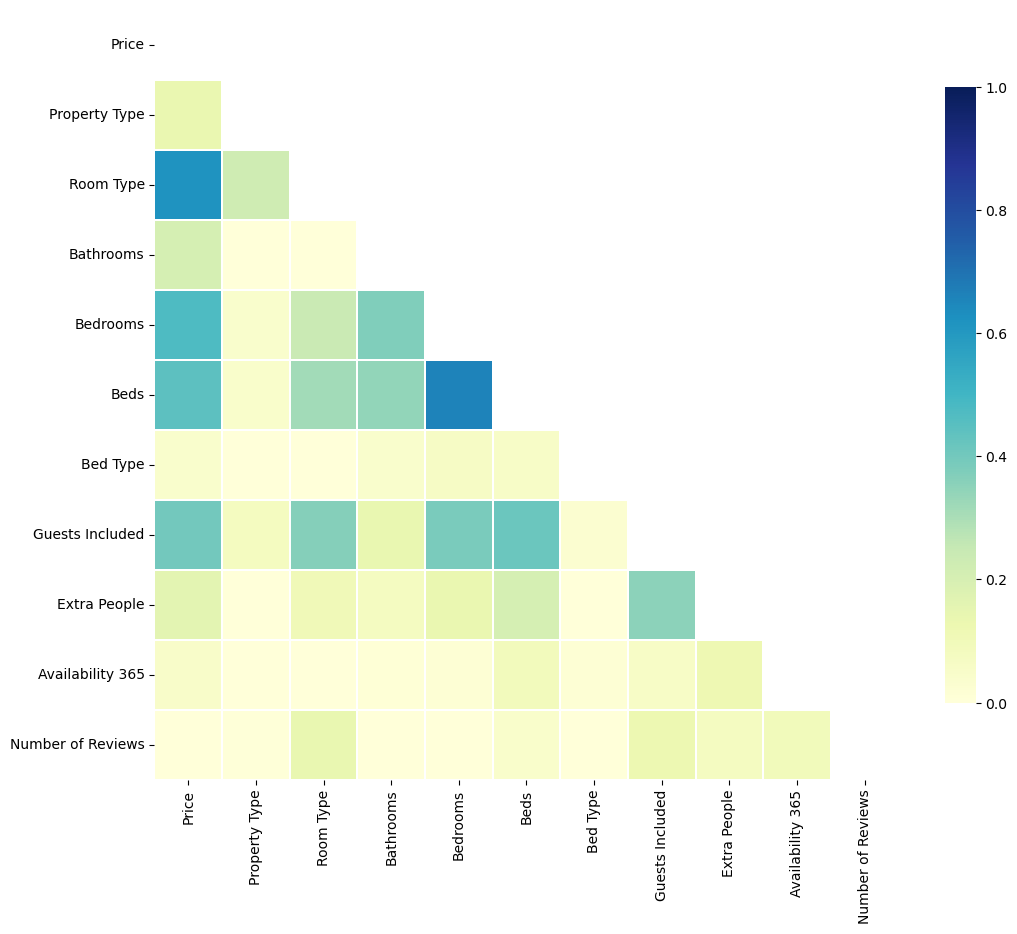

In [62]:
# Generación de la matriz de correlación
corr = np.abs(df).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [63]:
df.corr()

,Price,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Availability 365,Number of Reviews
Price,1.000000,0.136475,0.617962,0.204334,0.475729,0.443514,0.041172,0.402166,0.158287,0.051864,-0.002546
Property Type,0.136475,1.000000,0.222880,-0.030051,0.042337,0.045619,0.002890,0.080732,-0.019809,-0.030731,0.005867
Room Type,0.617962,0.222880,1.000000,-0.059010,0.240372,0.312775,-0.003328,0.365890,0.104314,-0.009500,0.136809
Bathrooms,0.204334,-0.030051,-0.059010,1.000000,0.372802,0.341337,0.040894,0.137423,0.076783,0.009292,-0.062088
Bedrooms,0.475729,0.042337,0.240372,0.372802,1.000000,0.658946,0.066123,0.384471,0.135956,0.016504,-0.024937
Beds,0.443514,0.045619,0.312775,0.341337,0.658946,1.000000,0.058539,0.416245,0.204033,0.093187,0.044089
Bed Type,0.041172,0.002890,-0.003328,0.040894,0.066123,0.058539,1.000000,0.028198,-0.009402,0.019281,-0.003532
Guests Included,0.402166,0.080732,0.365890,0.137423,0.384471,0.416245,0.028198,1.000000,0.354459,0.061509,0.123952
Extra People,0.158287,-0.019809,0.104314,0.076783,0.135956,0.204033,-0.009402,0.354459,1.000000,0.120486,0.076403
Availability 365,0.051864,-0.030731,-0.009500,0.009292,0.016504,0.093187,0.019281,0.061509,0.120486,1.000000,0.095358


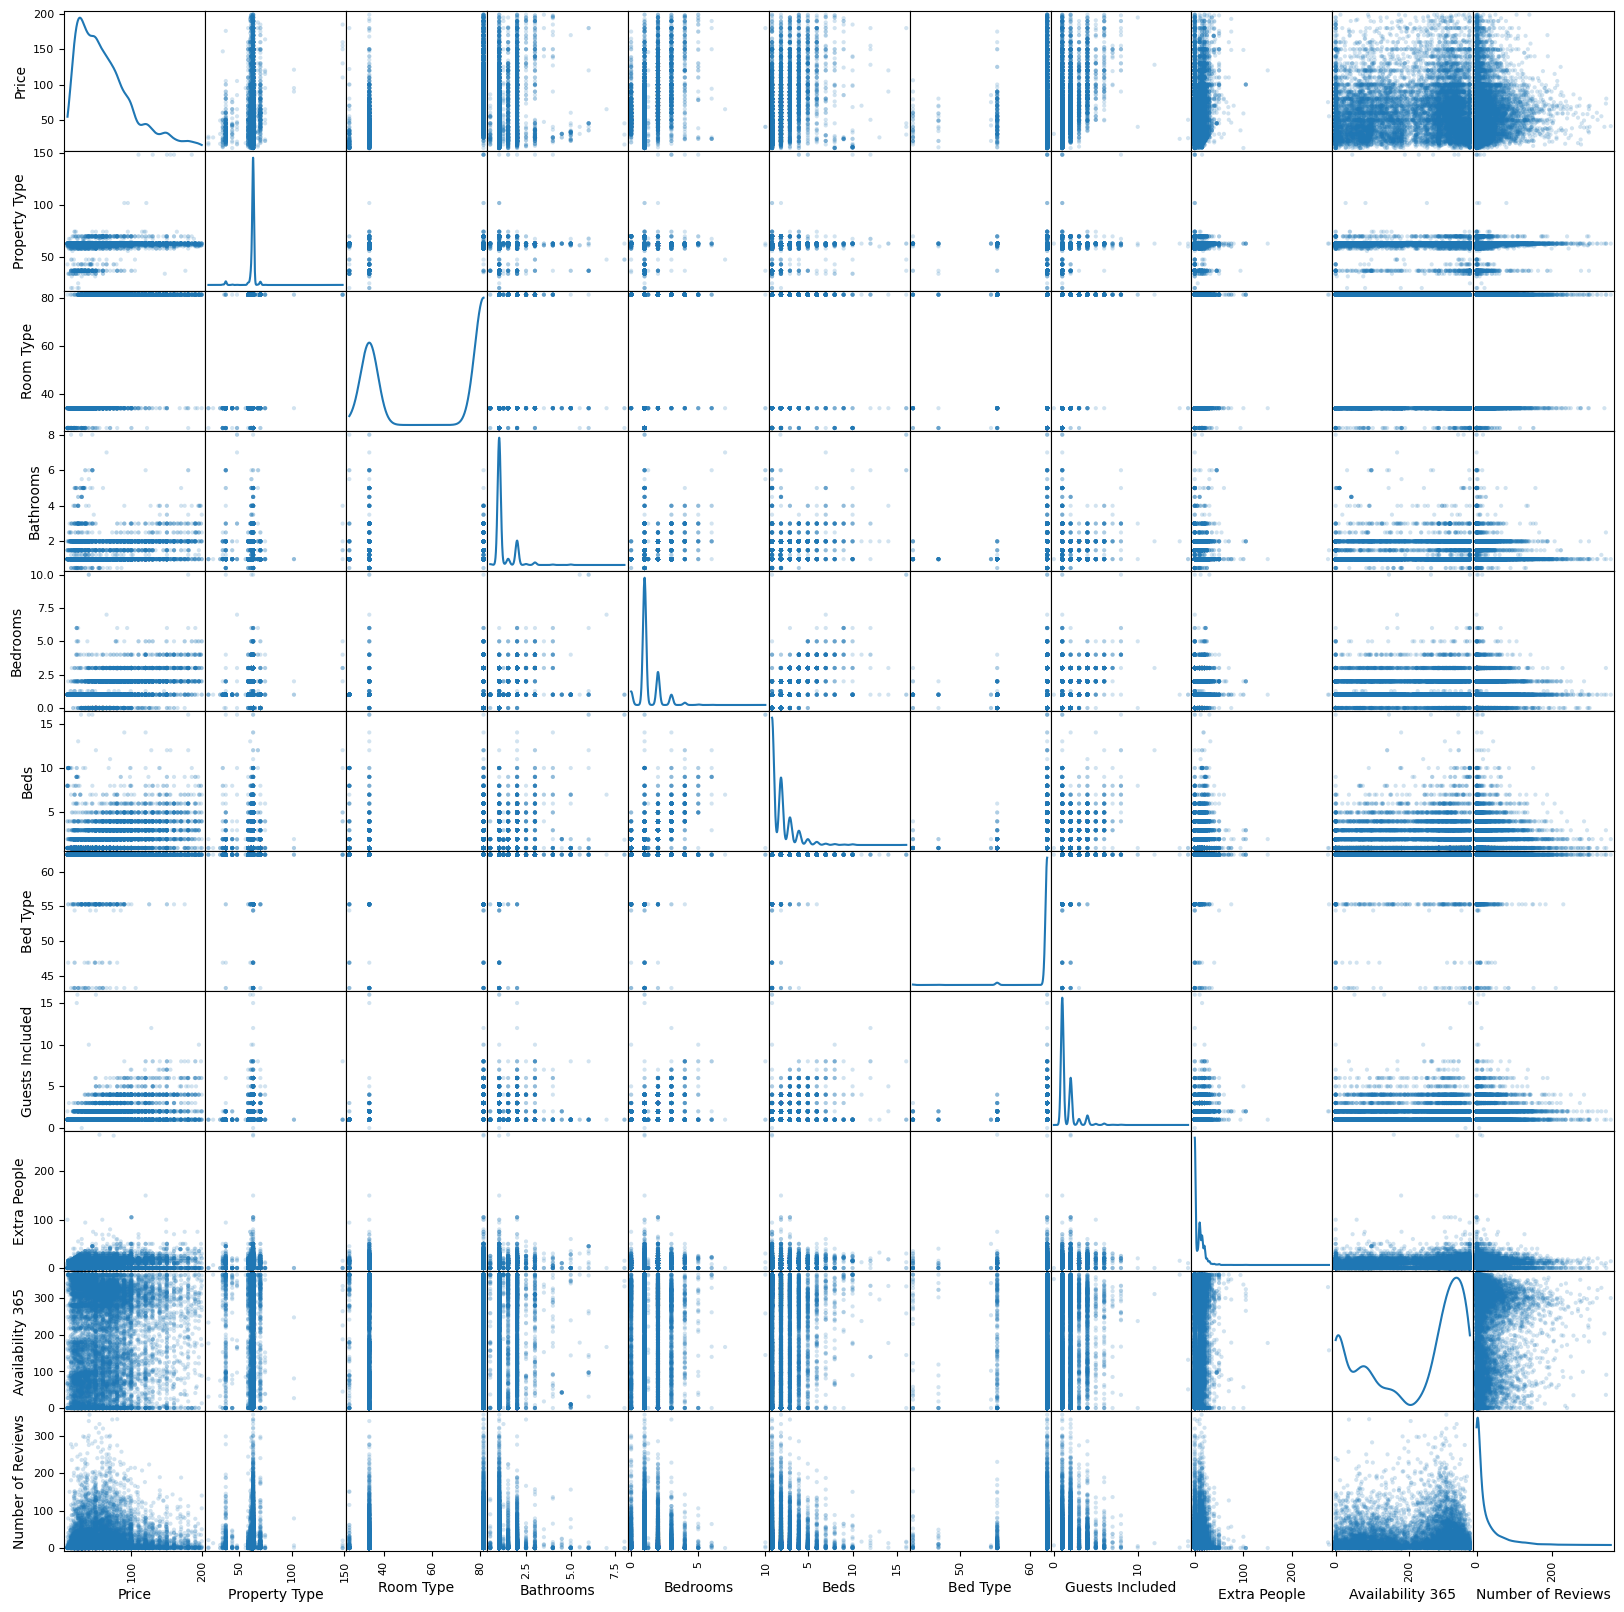

In [64]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# 4. Construcción y Validación

## Escalado

In [37]:
from sklearn import preprocessing

data = df.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto

feature_names = df.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

## Cross Validation

best mean cross-validation score: -678.654
best parameters: {'alpha': 0.03162277660168379}


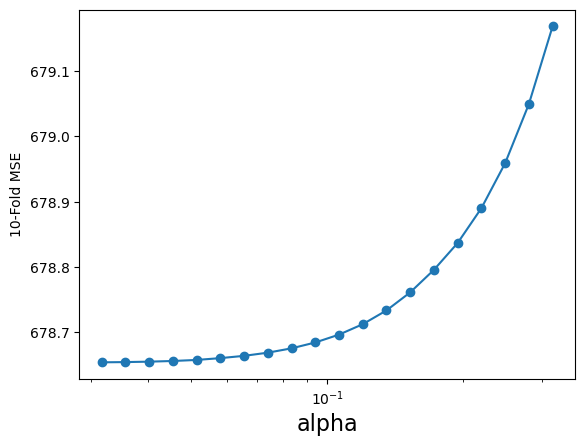

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1.5,-0.5,20)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

## Aplicando sobre Test

In [39]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# Elimino columnas que no puedo estudiar o no necesito
airbnb_drop = ["ID", "Listing Url", "Scrape ID", "Last Scraped", "Name", "Summary", "Host URL", "Host About", "Host Response Time",
                            "Space", "Description", "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules",
                            "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host Name", "Host Since",
                            "Host Location", "Host Thumbnail Url", "Host Neighbourhood", "Host Verifications", "Street",
                            "Neighbourhood", "Neighbourhood Cleansed", "State", "Country Code", "Country",
                            "Square Feet", "Weekly Price", "Monthly Price", "Has Availability", "Calendar last Scraped", "First Review",
                            "First Review", "Last Review", "License", "Jurisdiction Names", "Geolocation", "Neighbourhood",
                            "Host Picture Url", "Availability 30", "Availability 60", "Availability 90", "Review Scores Accuracy",
                            "Host Acceptance Rate", "Smart Location", "Zipcode", "City", "Amenities", "Calendar Updated", "Security Deposit",
                            "Host Listings Count", "Cleaning Fee", "Calculated host listings count", "Features", "Market", "Neighbourhood Group Cleansed",
                            "Host Response Rate", "Experiences Offered", "Minimum Nights", "Maximum Nights", "Host Total Listings Count"
                            ,"Cancellation Policy", "Accommodates", "Latitude", "Longitude", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value", "Reviews per Month"]

df_test.drop(airbnb_drop, axis=1, inplace=True)

df_test = df_test[df_test['Price'] < 200]

df_test = df_test[df_test['Bathrooms'] != 0]
df_test = df_test[df_test['Price'] != 0]

categorical = ["Property Type", "Room Type", "Bed Type"
]

# Categorizamos con los datos de train!
for c in categorical:
    df_test[c] = df_test[c].map(mean_map[c])

# Comprobamos que no quedan valores no numéricos
df[categorical].dtypes

Property Type    float64
Room Type        float64
Bed Type         float64
dtype: object

In [40]:
cols = df_test.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df_test = df_test[cols]

df_test.fillna(df.mean(), inplace=True)

print(df.shape, df_test.shape)

(11232, 11) (2807, 11)


In [42]:
data_test = df_test.values

y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

## Lasso

In [43]:
from sklearn.metrics import mean_squared_error 

alpha_optimo = grid.best_params_['alpha']#*10 #*100
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.5g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 677.21
MSE Modelo Lasso (test) : 659.12
Property Type 0.16337826716525355
Room Type 20.103604787135094
Bathrooms 4.269661876677277
Bedrooms 9.124183399356367
Beds 1.4365984294768348
Bed Type 0.6066493289483597
Guests Included 2.9992040121492516
Extra People 0.9466771418371422
Availability 365 1.7738147500725745
Number of Reviews -2.9975995056692413


# 5. Modelado

## Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500, 1000, 5000, 8000]
learningRate = [0.1, 0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was p

best mean cross-validation score: 0.608
best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


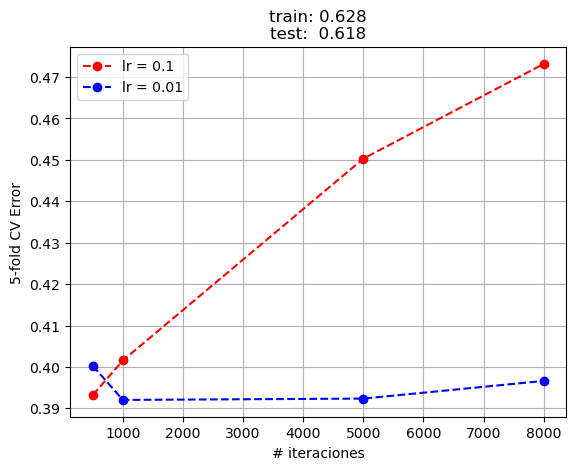

In [46]:
learning_rate = grid.best_params_['learning_rate']
NEstimators = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=learning_rate, n_estimators=NEstimators)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

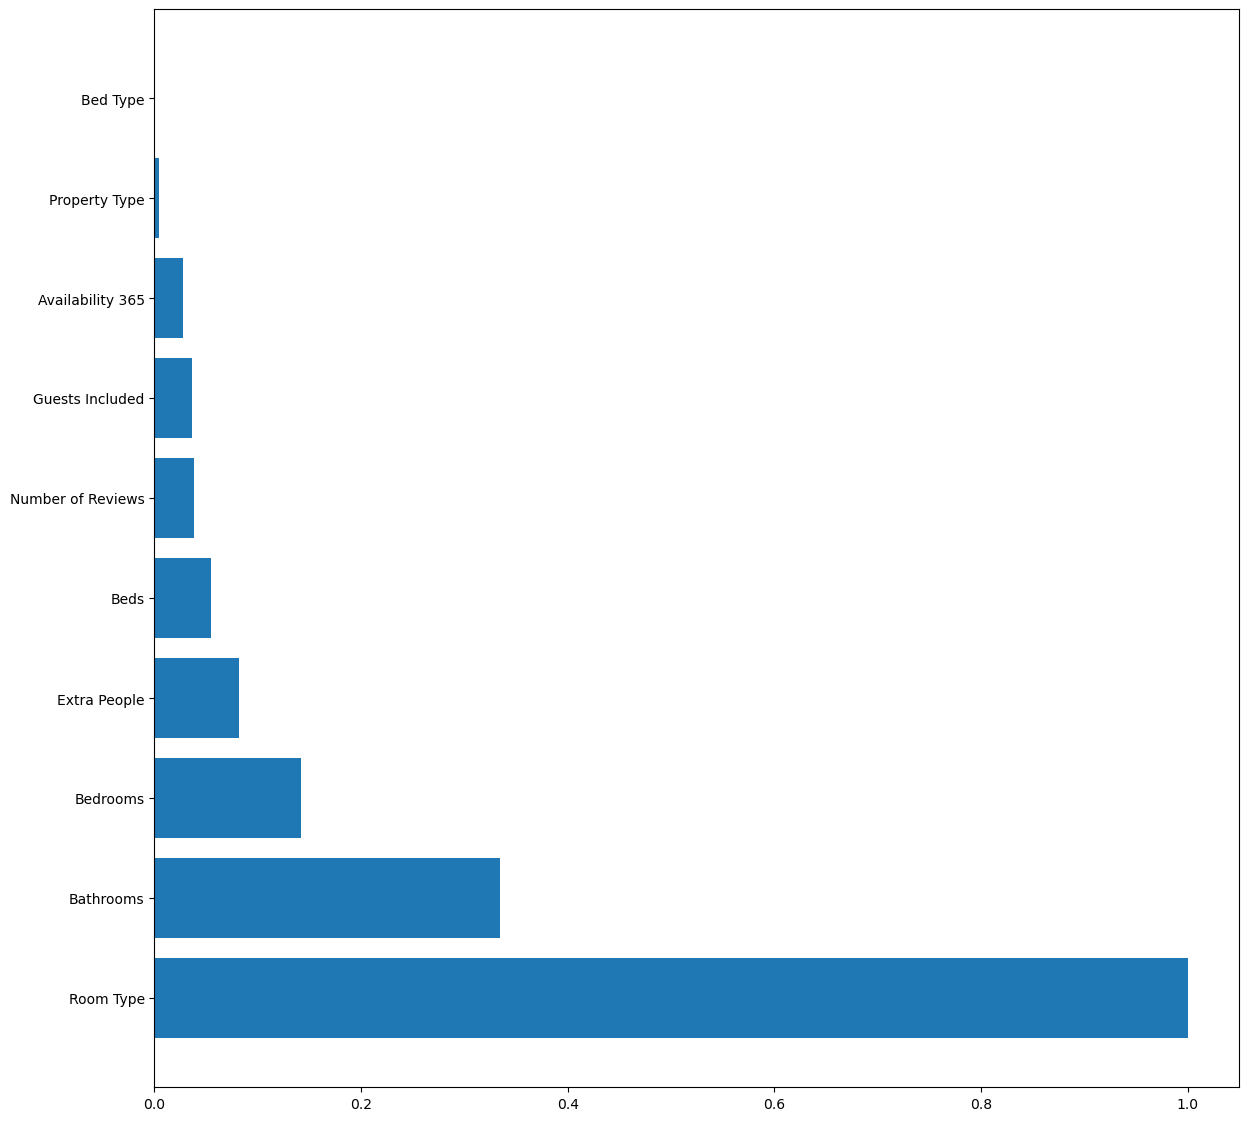

In [47]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14,14))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Bagging

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV] END .............................estimator__max_depth=3; total time=   0.0s
[CV] END .............................estimator__max_depth=3; total time=   0.0s
[CV] END .............................estimator__max_depth=3; total time=   0.0s
[CV] END .............................estimator__max_depth=3; total time=   0.0s
[CV] END .............................estimator__max_depth=3; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV] END .............................estimator__max_depth=4; total time=   0.0s
[CV] END .............................estimator__max_depth=4; total time=   0.0s
[CV] END .............................estimator__max_depth=4; total time=   0.0s
[CV] END .............................estimator__max_depth=4; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

[CV] END .............................estimator__max_depth=4; total time=   0.0s
[CV] END .............................estimator__max_depth=5; total time=   0.0s
[CV] END .............................estimator__max_depth=5; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=5; total time=   0.0s
[CV] END .............................estimator__max_depth=5; total time=   0.0s
[CV] END .............................estimator__max_depth=5; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=6; total time=   0.0s
[CV] END .............................estimator__max_depth=6; total time=   0.0s
[CV] END .............................estimator__max_depth=6; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=6; total time=   0.0s
[CV] END .............................estimator__max_depth=6; total time=   0.0s
[CV] END .............................estimator__max_depth=7; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=7; total time=   0.0s
[CV] END .............................estimator__max_depth=7; total time=   0.0s
[CV] END .............................estimator__max_depth=7; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=7; total time=   0.0s
[CV] END .............................estimator__max_depth=8; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=8; total time=   0.0s
[CV] END .............................estimator__max_depth=8; total time=   0.0s
[CV] END .............................estimator__max_depth=8; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=8; total time=   0.0s
[CV] END .............................estimator__max_depth=9; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=9; total time=   0.0s
[CV] END .............................estimator__max_depth=9; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END .............................estimator__max_depth=9; total time=   0.0s
[CV] END .............................estimator__max_depth=9; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=10; total time=   0.0s
[CV] END ............................estimator__max_depth=10; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=10; total time=   0.0s
[CV] END ............................estimator__max_depth=10; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=10; total time=   0.0s
[CV] END ............................estimator__max_depth=11; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=11; total time=   0.1s
[CV] END ............................estimator__max_depth=11; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=11; total time=   0.1s
[CV] END ............................estimator__max_depth=11; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=12; total time=   0.1s
[CV] END ............................estimator__max_depth=12; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=12; total time=   0.0s
[CV] END ............................estimator__max_depth=12; total time=   0.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=12; total time=   0.0s
[CV] END ............................estimator__max_depth=13; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=13; total time=   0.1s
[CV] END ............................estimator__max_depth=13; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=13; total time=   0.1s
[CV] END ............................estimator__max_depth=13; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=14; total time=   0.1s
[CV] END ............................estimator__max_depth=14; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=14; total time=   0.1s
[CV] END ............................estimator__max_depth=14; total time=   0.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


[CV] END ............................estimator__max_depth=14; total time=   0.1s
best mean cross-validation score: -581.885
best parameters: {'estimator__max_depth': 8}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


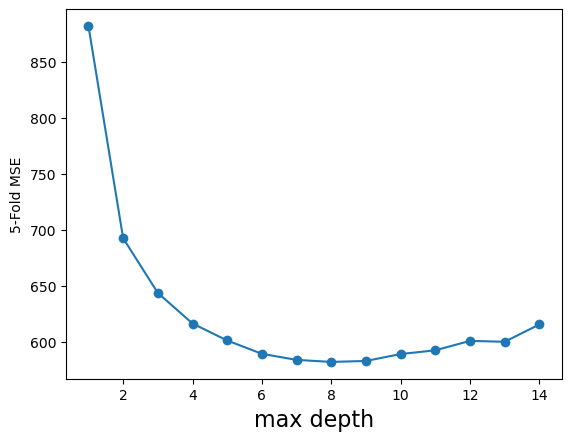

In [48]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor

max_depth_vector = range(1,15)
param_grid = {'estimator__max_depth': max_depth_vector}
grid = GridSearchCV(
    BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0)),
    scoring= 'neg_mean_squared_error',
    param_grid=param_grid,
    cv = 5,
    verbose=2
).fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth_vector,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [49]:
maxDepthOptimo = grid.best_params_['estimator__max_depth']
baggingModel = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),
    n_estimators=200
).fit(X_train,y_train)

print("Train: ", baggingModel.score(X_train,y_train))
print("Test: ", baggingModel.score(X_test,y_test))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train:  0.6573438819271348
Test:  0.617292246264733


## Random Forest

Fitting 3 folds for each of 14 candidates, totalling 42 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.4s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.4s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.4s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.4s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.5s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.5s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.5s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.5s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.5s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.5s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.6s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.6s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.6s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   0.7s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   0.7s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   0.7s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   0.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   0.7s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   0.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   0.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   0.8s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   0.9s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   0.9s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   0.9s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   0.9s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.0s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.1s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.2s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.3s


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


best mean cross-validation score: 0.608
best parameters: {'max_depth': 11}


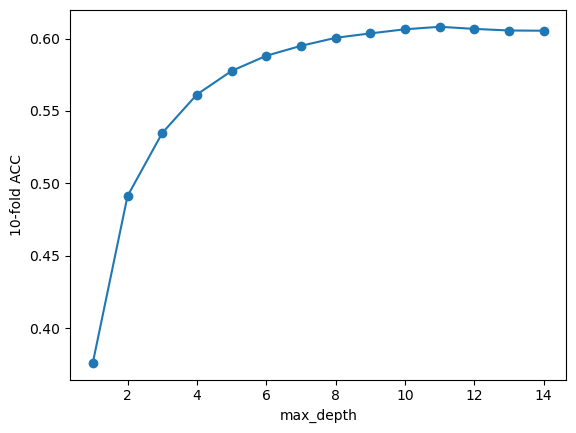

In [50]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [51]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train:  0.7090847604162045
Test:  0.6271939289215066


## Otros Boosting

In [52]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=0, max_depth=5, learning_rate=0.09, n_estimators=500)
xgb.fit(X_train,y_train)

print("Train: ",xgb.score(X_train,y_train))
print("Test: ",xgb.score(X_test,y_test))

Train:  0.7442161725693353
Test:  0.6203395441009876


In [53]:
from lightgbm import LGBMRegressor

gbm = LGBMRegressor(random_state=0, max_depth=5,learning_rate=0.09, n_estimators=500)
gbm.fit(X_train,y_train)

print("Train: ",gbm.score(X_train,y_train))
print("Test: ",gbm.score(X_test,y_test))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 11232, number of used features: 10
[LightGBM] [Info] Start training from score 62.231481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## Resumen

In [57]:
print("Scoring de los modelos usados")
print("-"*40)
print("Bagging")
print("Train: ", baggingModel.score(X_train,y_train))
print("Test: ", baggingModel.score(X_test,y_test))
print("-"*40)
print("RandomForest")
print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))
print("-"*40)
print("XGBoost")
print("Train: ",xgb.score(X_train,y_train))
print("Test: ",xgb.score(X_test,y_test))
print("-"*40)
print("LightGBM")
print("Train: ",gbm.score(X_train,y_train))
print("Test: ",gbm.score(X_test,y_test))


Scoring de los modelos usados
----------------------------------------
Bagging
Train:  0.6573438819271348
Test:  0.617292246264733
----------------------------------------
RandomForest
Train:  0.7090847604162045
Test:  0.6271939289215066
----------------------------------------
XGBoost
Train:  0.7442161725693353
Test:  0.6203395441009876
----------------------------------------
LightGBM
Train:  0.707475571968267
Test:  0.6234991431767483
